# Adding a colorbar to a Bloch Sphere

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from qutip import *
from qutip.ipynbtools import version_table
%matplotlib inline

## Do a closed Landau-Zener Evolution

In [2]:
delta = 0.5 * 2 * np.pi
v = 2.0 * 2 * np.pi # sweep rate

H0 = delta/2.0 * sigmax()
H1 = v/2.0 * sigmaz()
H = [H0, [H1, 't']]
psi0 = basis(2,0)

sm = destroy(2)
sx=sigmax();
sy=sigmay()
sz=sigmaz()
expt_ops = [sm.dag() * sm,sx,sy,sz]


tlist = np.linspace(-10.0, 10.0, 1500)
expt_list = sesolve(H, psi0, tlist, expt_ops).expect

## Generate a Bloch Sphere with Multi-Colored Points

Note that I need to call `b.show` here so that I can grab a Figure instance later

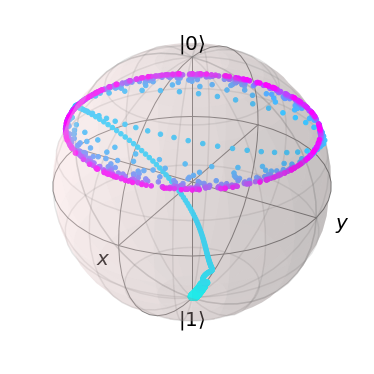

In [3]:
b = Bloch()
## normalize colors to times in tlist ##
nrm = mpl.colors.Normalize(-2,10)
colors = cm.cool(nrm(tlist))

## add data points from expectation values ##
b.add_points([expt_list[1],
              expt_list[2],
              -expt_list[3]],'m')

## customize sphere properties ##
b.point_color = [colors]
b.point_marker = ['o']
b.point_size = [20]

b.zlpos = [1.1,-1.2]

b.show()

## Add  New Axis to Bloch Figure

In [4]:
left, bottom, width, height = [0.98, 0.05, 0.05, 0.9]
ax2 = b.fig.add_axes([left, bottom, width, height])

mpl.colorbar.ColorbarBase(ax2, cmap=cm.cool,
                                norm=nrm,
                                orientation='vertical');

## Plot with Colorbar Added

Currently I need to call `b.fig` as replotting figures in a notebook is a bit tricky.  However, this is likely to be improved in the future.

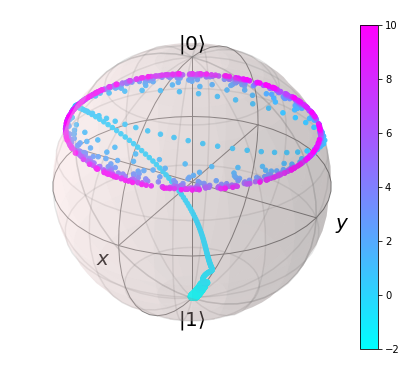

In [5]:
b.fig

In [6]:
version_table()

Software,Version
QuTiP,4.6.0.dev0+76c096f9
Numpy,1.18.5
SciPy,1.5.0
matplotlib,3.2.2
Cython,0.29.20
Number of CPUs,4
BLAS Info,INTEL MKL
IPython,7.16.1
Python,"3.8.3 (default, Jul 2 2020, 16:21:59) [GCC 7.3.0]"
OS,posix [linux]
